<a href="https://colab.research.google.com/github/JakeSiewJK64/colabNotebooks/blob/master/NeuralNetworksClothingImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%tensorflow_version 2.x

# import main packages
import tensorflow as tf
import tensorflow.keras as keras

# helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Loading the dataset

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

## Train Test Split

In [10]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [18]:
print("Shape: {}".format(train_images.shape))
print("Type: {}".format(type(train_images)))
# 60,000 images with 28 x 28 each

Shape: (60000, 28, 28)
Type: <class 'numpy.ndarray'>


In [23]:
train_images[0,23,23]
# grayscale image
# 0 to 255
# we can deal with as long as there is an RGB value

194

In [24]:
print(train_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [26]:
train_labels[:10]
# we have 10 different types of clothing

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

## Creating a list of classes

In [27]:
class_names = ['T-Shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle Boot']

## Displaying images using matplotlib

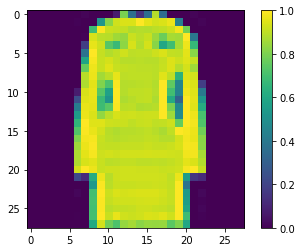

In [63]:
plt.figure() # create a figure
plt.imshow(train_images[500]) # show the image
plt.colorbar() # display with color (optional)
plt.grid(False) # say you don;t want a grid (optional)
plt.show() # plot the graph/image

## Data Preprocessing
- This is so that smaller values will be easier to process
- We can do this by dividing the 255 hex value by 255 so that it is between 0 to 1.

In [39]:
train_images = train_images / 255.0
test_imags = test_images / 255.0

## Creating the model
- using Keras Sequential Model


In [41]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)), # input (28 x 28 = 784 neurons) make into 1d
  keras.layers.Dense(128, activation='relu'), # hidden layer (128 neurons)
  keras.layers.Dense(10, activation='softmax')]) # output layer (10 neurons) makes sure tht the values add up between 0 to 1

## Compile the model
- defining the loss/cost function
- defining theoptimizer
- defining the metrics


## Hyperparameter Tuning

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model
P.S. Usually training and fit are interchangeable 

In [68]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1781 - accuracy: 0.9322
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1741 - accuracy: 0.9340
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1713 - accuracy: 0.9351
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1669 - accuracy: 0.9367
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1610 - accuracy: 0.9390
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1569 - accuracy: 0.9405
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1540 - accuracy: 0.9421
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1489 - accuracy: 0.9432
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1489 - accuracy: 0.9438
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.144

## evalutating the model
- using built-in method from Keras
- using tensorflow evaluate method .evaluate()

<hr>
Verbose:
- how much is printing to the console
- how much information are we going to see
- are we looking at output

In [69]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Test Accuracy: {:.4f} '.format(test_accuracy))

313/313 [==============================] - 0s 1ms/step - loss: 96.2234 - accuracy: 0.8613
Test Accuracy: 0.8613 


## Making Predictions


In [87]:
predictions = model.predict(test_images)
outcome = np.argmax(predictions[0]) # np.argmax() returns the index with the highest value
print("Prediction for first image: ", class_names[outcome])

Prediction for first image:  Ankle Boot


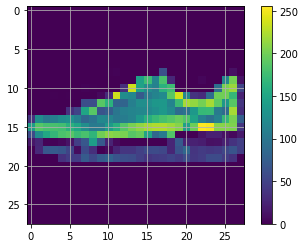

In [90]:
plt.figure()
plt.imshow(test_images[outcome])
plt.colorbar()
plt.grid(True)
plt.show()

## Example application for the above Seuqential Neural Network Script

In [93]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, images, correct_labels):
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  show_image(image, class_names[correct_labels], predicted_class)

In [98]:
# function that will display the image in proper format
def show_image(img, class_name, predicted_class):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()  
  plt.title("Expected: {}".format(class_name))
  plt.xlabel("Guess: {}".format(predicted_class))
  plt.grid(False)

Pick a number: 3


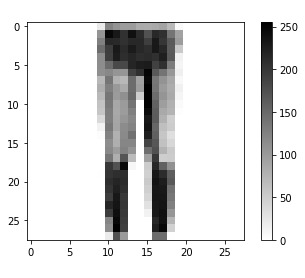

In [102]:
# function to get a number
def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num) # cast input type to int
      if 0 <= num <= 1000:
        return int(num)
      else:
        print("Type another number.")
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)